# Purpose of analysis
The purpose of this project is to perform data analysis on Soccer database using pandas and sqlite3 to draw conclusions related to the following questions:

1 - What team attributes lead to the most victories?<br>
2 - Which players improved the most in penalties?<br>
3 - Do rightfoot players have more shot accuracy/power than leftfoot players?<br>


# MetaData

The database contains 8 tables as follows:

1 - Country <br>
2 - League<br>
3 - Players<br>
4 - Players' Attributes<br>
5 - Teams<br>
6 - Teams' Attributes<br>
7 - Matches<br>
8 - Sqllite sequences<br>

All information about each table can be found in this [Kaggle link](https://www.kaggle.com/datasets/hugomathien/soccer?resource=download)

# Imports

In [601]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [602]:
# establishing sql connection
conn = sqlite3.connect("database.sqlite") 

# Creating Dataframes from Soccer database

In order to import tables from sqlite into dataframes, we must decide which tables are we interested into. We will define these tables according to the questions.<br> 



# Question 1: What team attributes lead to the most victories?

We will answer this question on each league separately. For each league, we will count the number of victories of each team across all seasons, then find the attributes of the team with maximum victories from the teams table. Draws do not count

In [603]:
#reading query into pandas

sql = pd.read_sql_query("SELECT League.name, Match.season, Match.home_team_api_id,Match.away_team_api_id, Match.home_team_goal,Match.away_team_goal from Match INNER JOIN League on Match.league_id = League.id",conn)


In [604]:
df_matches = pd.DataFrame(sql)
df_matches[df_matches["home_team_api_id"] == 7947]

,name,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
4,Belgium Jupiler League,2008/2009,7947,9985,1,3
13,Belgium Jupiler League,2008/2009,7947,10001,2,2
31,Belgium Jupiler League,2008/2009,7947,8571,1,0
49,Belgium Jupiler League,2008/2009,7947,8635,0,2
67,Belgium Jupiler League,2008/2009,7947,9994,1,1
98,Belgium Jupiler League,2008/2009,7947,9993,0,1
117,Belgium Jupiler League,2008/2009,7947,8342,0,2
141,Belgium Jupiler League,2008/2009,7947,8203,1,2
151,Belgium Jupiler League,2008/2009,7947,4049,4,0
166,Belgium Jupiler League,2008/2009,7947,9984,1,0


In [605]:
#check null values
df_matches.isna().sum()

name                0
season              0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

In [606]:
#check data type consistency
df_matches.dtypes

name                object
season              object
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

In [607]:
#describe the data
df_matches.describe()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000
mean,9984.371993,9984.475115,1.544594,1.160938
std,14087.453758,14087.445135,1.297158,1.142110
min,1601.000000,1601.000000,0.000000,0.000000
25%,8475.000000,8475.000000,1.000000,0.000000
50%,8697.000000,8697.000000,1.000000,1.000000
75%,9925.000000,9925.000000,2.000000,2.000000
max,274581.000000,274581.000000,10.000000,9.000000


In [608]:
#create nested dictionary for each season in each league

leagues_seasons_wins = {}

for league_name in df_matches['name'].unique():
    
    leagues_seasons_wins[league_name] = {}


In [609]:
#Group the dataframe by league_name, season, home team

grouped_df_matches_home = df_matches.groupby(["name","season",'home_team_api_id'])

#Group the dataframe by league_name, season, away team

grouped_df_matches_away = df_matches.groupby(["name","season",'away_team_api_id'])


In [610]:
#Count number of wins per all seasons of each team

for name,group in grouped_df_matches_home:
        
    count = group[group.home_team_goal > group.away_team_goal].shape[0]
    
    if(leagues_seasons_wins[name[0]].get(name[2]) != None):
        
        leagues_seasons_wins[name[0]][name[2]]+=count
    else:
        
        leagues_seasons_wins[name[0]][name[2]] = count
        
        
for name,group in grouped_df_matches_away:
        
    count = group[group.home_team_goal < group.away_team_goal].shape[0]
    
    if(leagues_seasons_wins[name[0]].get(name[2]) != None):
        
        leagues_seasons_wins[name[0]][name[2]]+=count
    else:
        
        leagues_seasons_wins[name[0]][name[2]] = count


In [611]:
#import team table joined with team_attributes

sql = pd.read_sql_query("SELECT team_api_id, team_long_name,team_short_name from Team",conn)
teams_df = pd.DataFrame(sql)

teams_df

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB
...,...,...,...
294,10190,FC St. Gallen,GAL
295,10191,FC Thun,THU
296,9777,Servette FC,SER
297,7730,FC Lausanne-Sports,LAU


In [612]:
#printing teams with most wins in each team
team_ids = []
for key in leagues_seasons_wins.keys():
    
    maximum_goals = max(leagues_seasons_wins[key].values())
    team_id = [i for i in leagues_seasons_wins[key] if leagues_seasons_wins[key][i] == maximum_goals]
    league_name = key
    team_name = teams_df.query("team_api_id == {}".format(team_id[0])).team_long_name.values[0]
    #if there are multiple teams with the same number of goals, choose the first one.
    team_ids.append(team_id[0])
    print("Team with most victories in {} is: {} with number of victories = {}".format(league_name,team_name,maximum_goals))
        
    
    

Team with most victories in Belgium Jupiler League is: RSC Anderlecht with number of victories = 136
Team with most victories in England Premier League is: Manchester United with number of victories = 192
Team with most victories in France Ligue 1 is: Paris Saint-Germain with number of victories = 175
Team with most victories in Germany 1. Bundesliga is: FC Bayern Munich with number of victories = 193
Team with most victories in Italy Serie A is: Juventus with number of victories = 189
Team with most victories in Netherlands Eredivisie is: Ajax with number of victories = 181
Team with most victories in Poland Ekstraklasa is: Legia Warszawa with number of victories = 137
Team with most victories in Portugal Liga ZON Sagres is: SL Benfica with number of victories = 185
Team with most victories in Scotland Premier League is: Celtic with number of victories = 218
Team with most victories in Spain LIGA BBVA is: FC Barcelona with number of victories = 234
Team with most victories in Switzerl

In [613]:
#import team attributes table to get the attributes of teams with most victories

sql = pd.read_sql_query("Select * from Team_Attributes",conn)
team_attributes_df = pd.DataFrame(sql)
team_attributes_df

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [614]:
attributes_df = team_attributes_df.query("team_api_id == {}".format(team_ids[0]))

for i in range(1, len(team_ids)):
    
    temp_df = team_attributes_df.query("team_api_id == {}".format(team_ids[i]))
    attributes_df = attributes_df.append(temp_df)

#print the attributes of each team 
attributes_df

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
45,46,229,8635,2010-02-22 00:00:00,50,Balanced,NaN,Little,35,Mixed,...,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
46,47,229,8635,2011-02-22 00:00:00,50,Balanced,NaN,Little,52,Mixed,...,60,Normal,Organised,70,High,50,Press,70,Wide,Offside Trap
47,48,229,8635,2012-02-22 00:00:00,52,Balanced,NaN,Little,41,Mixed,...,47,Normal,Organised,45,Medium,43,Press,52,Normal,Cover
48,49,229,8635,2013-09-20 00:00:00,52,Balanced,NaN,Little,41,Mixed,...,47,Normal,Organised,60,Medium,43,Press,65,Normal,Cover
49,50,229,8635,2014-09-19 00:00:00,52,Balanced,46.0,Normal,51,Mixed,...,47,Normal,Organised,60,Medium,50,Press,65,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,896,9931,2011-02-22 00:00:00,46,Balanced,NaN,Little,40,Mixed,...,49,Normal,Organised,38,Medium,53,Press,55,Normal,Cover
132,133,896,9931,2012-02-22 00:00:00,61,Balanced,NaN,Little,46,Mixed,...,54,Normal,Organised,47,Medium,58,Press,53,Normal,Cover
133,134,896,9931,2013-09-20 00:00:00,61,Balanced,NaN,Little,46,Mixed,...,54,Normal,Organised,47,Medium,58,Press,53,Normal,Cover
134,135,896,9931,2014-09-19 00:00:00,61,Balanced,63.0,Normal,46,Mixed,...,54,Normal,Organised,47,Medium,58,Press,53,Normal,Cover


In [615]:
#check nulls
attributes_df.isna().sum()

id                                 0
team_fifa_api_id                   0
team_api_id                        0
date                               0
buildUpPlaySpeed                   0
buildUpPlaySpeedClass              0
buildUpPlayDribbling              44
buildUpPlayDribblingClass          0
buildUpPlayPassing                 0
buildUpPlayPassingClass            0
buildUpPlayPositioningClass        0
chanceCreationPassing              0
chanceCreationPassingClass         0
chanceCreationCrossing             0
chanceCreationCrossingClass        0
chanceCreationShooting             0
chanceCreationShootingClass        0
chanceCreationPositioningClass     0
defencePressure                    0
defencePressureClass               0
defenceAggression                  0
defenceAggressionClass             0
defenceTeamWidth                   0
defenceTeamWidthClass              0
defenceDefenderLineClass           0
dtype: int64

In [616]:
attributes_df["buildUpPlayDribbling"] = attributes_df.groupby("team_api_id")["buildUpPlayDribbling"].transform('mean')


In [617]:
#check nulls
attributes_df.isna().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [618]:
#To get teams' name
attributes_df = attributes_df.merge(teams_df, how = 'inner', on = "team_api_id")

In [619]:
attributes_df = attributes_df.drop(columns = ["team_api_id","team_fifa_api_id","id"])

In [620]:
attributes_df

,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,2010-02-22 00:00:00,50,Balanced,46.0,Little,35,Mixed,Organised,70,Risky,...,Organised,70,High,50,Press,70,Wide,Cover,RSC Anderlecht,AND
1,2011-02-22 00:00:00,50,Balanced,46.0,Little,52,Mixed,Free Form,70,Risky,...,Organised,70,High,50,Press,70,Wide,Offside Trap,RSC Anderlecht,AND
2,2012-02-22 00:00:00,52,Balanced,46.0,Little,41,Mixed,Organised,53,Normal,...,Organised,45,Medium,43,Press,52,Normal,Cover,RSC Anderlecht,AND
3,2013-09-20 00:00:00,52,Balanced,46.0,Little,41,Mixed,Organised,68,Risky,...,Organised,60,Medium,43,Press,65,Normal,Cover,RSC Anderlecht,AND
4,2014-09-19 00:00:00,52,Balanced,46.0,Normal,51,Mixed,Organised,60,Normal,...,Organised,60,Medium,50,Press,65,Normal,Cover,RSC Anderlecht,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011-02-22 00:00:00,46,Balanced,63.0,Little,40,Mixed,Organised,51,Normal,...,Organised,38,Medium,53,Press,55,Normal,Cover,FC Basel,BAS
62,2012-02-22 00:00:00,61,Balanced,63.0,Little,46,Mixed,Organised,66,Normal,...,Organised,47,Medium,58,Press,53,Normal,Cover,FC Basel,BAS
63,2013-09-20 00:00:00,61,Balanced,63.0,Little,46,Mixed,Organised,66,Normal,...,Organised,47,Medium,58,Press,53,Normal,Cover,FC Basel,BAS
64,2014-09-19 00:00:00,61,Balanced,63.0,Normal,46,Mixed,Organised,66,Normal,...,Organised,47,Medium,58,Press,53,Normal,Cover,FC Basel,BAS


### The attributes_df is the dataframe containing the attributes of teams with most victories in their leagues over intervals of time. 

### The following part is for graphing the total number of goals for each team in each league

In [621]:
#replace team ids with team short names

keys = list(leagues_seasons_wins.keys())
print(keys)
for key in keys:
    
    subkeys = list(leagues_seasons_wins[key].keys())  
    for sub_key in subkeys:
        team_name = teams_df.query("team_api_id == {}".format(sub_key))["team_short_name"].values[0]
        leagues_seasons_wins[key][team_name] = leagues_seasons_wins[key].pop(sub_key)


['Belgium Jupiler League', 'England Premier League', 'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A', 'Netherlands Eredivisie', 'Poland Ekstraklasa', 'Portugal Liga ZON Sagres', 'Scotland Premier League', 'Spain LIGA BBVA', 'Switzerland Super League']


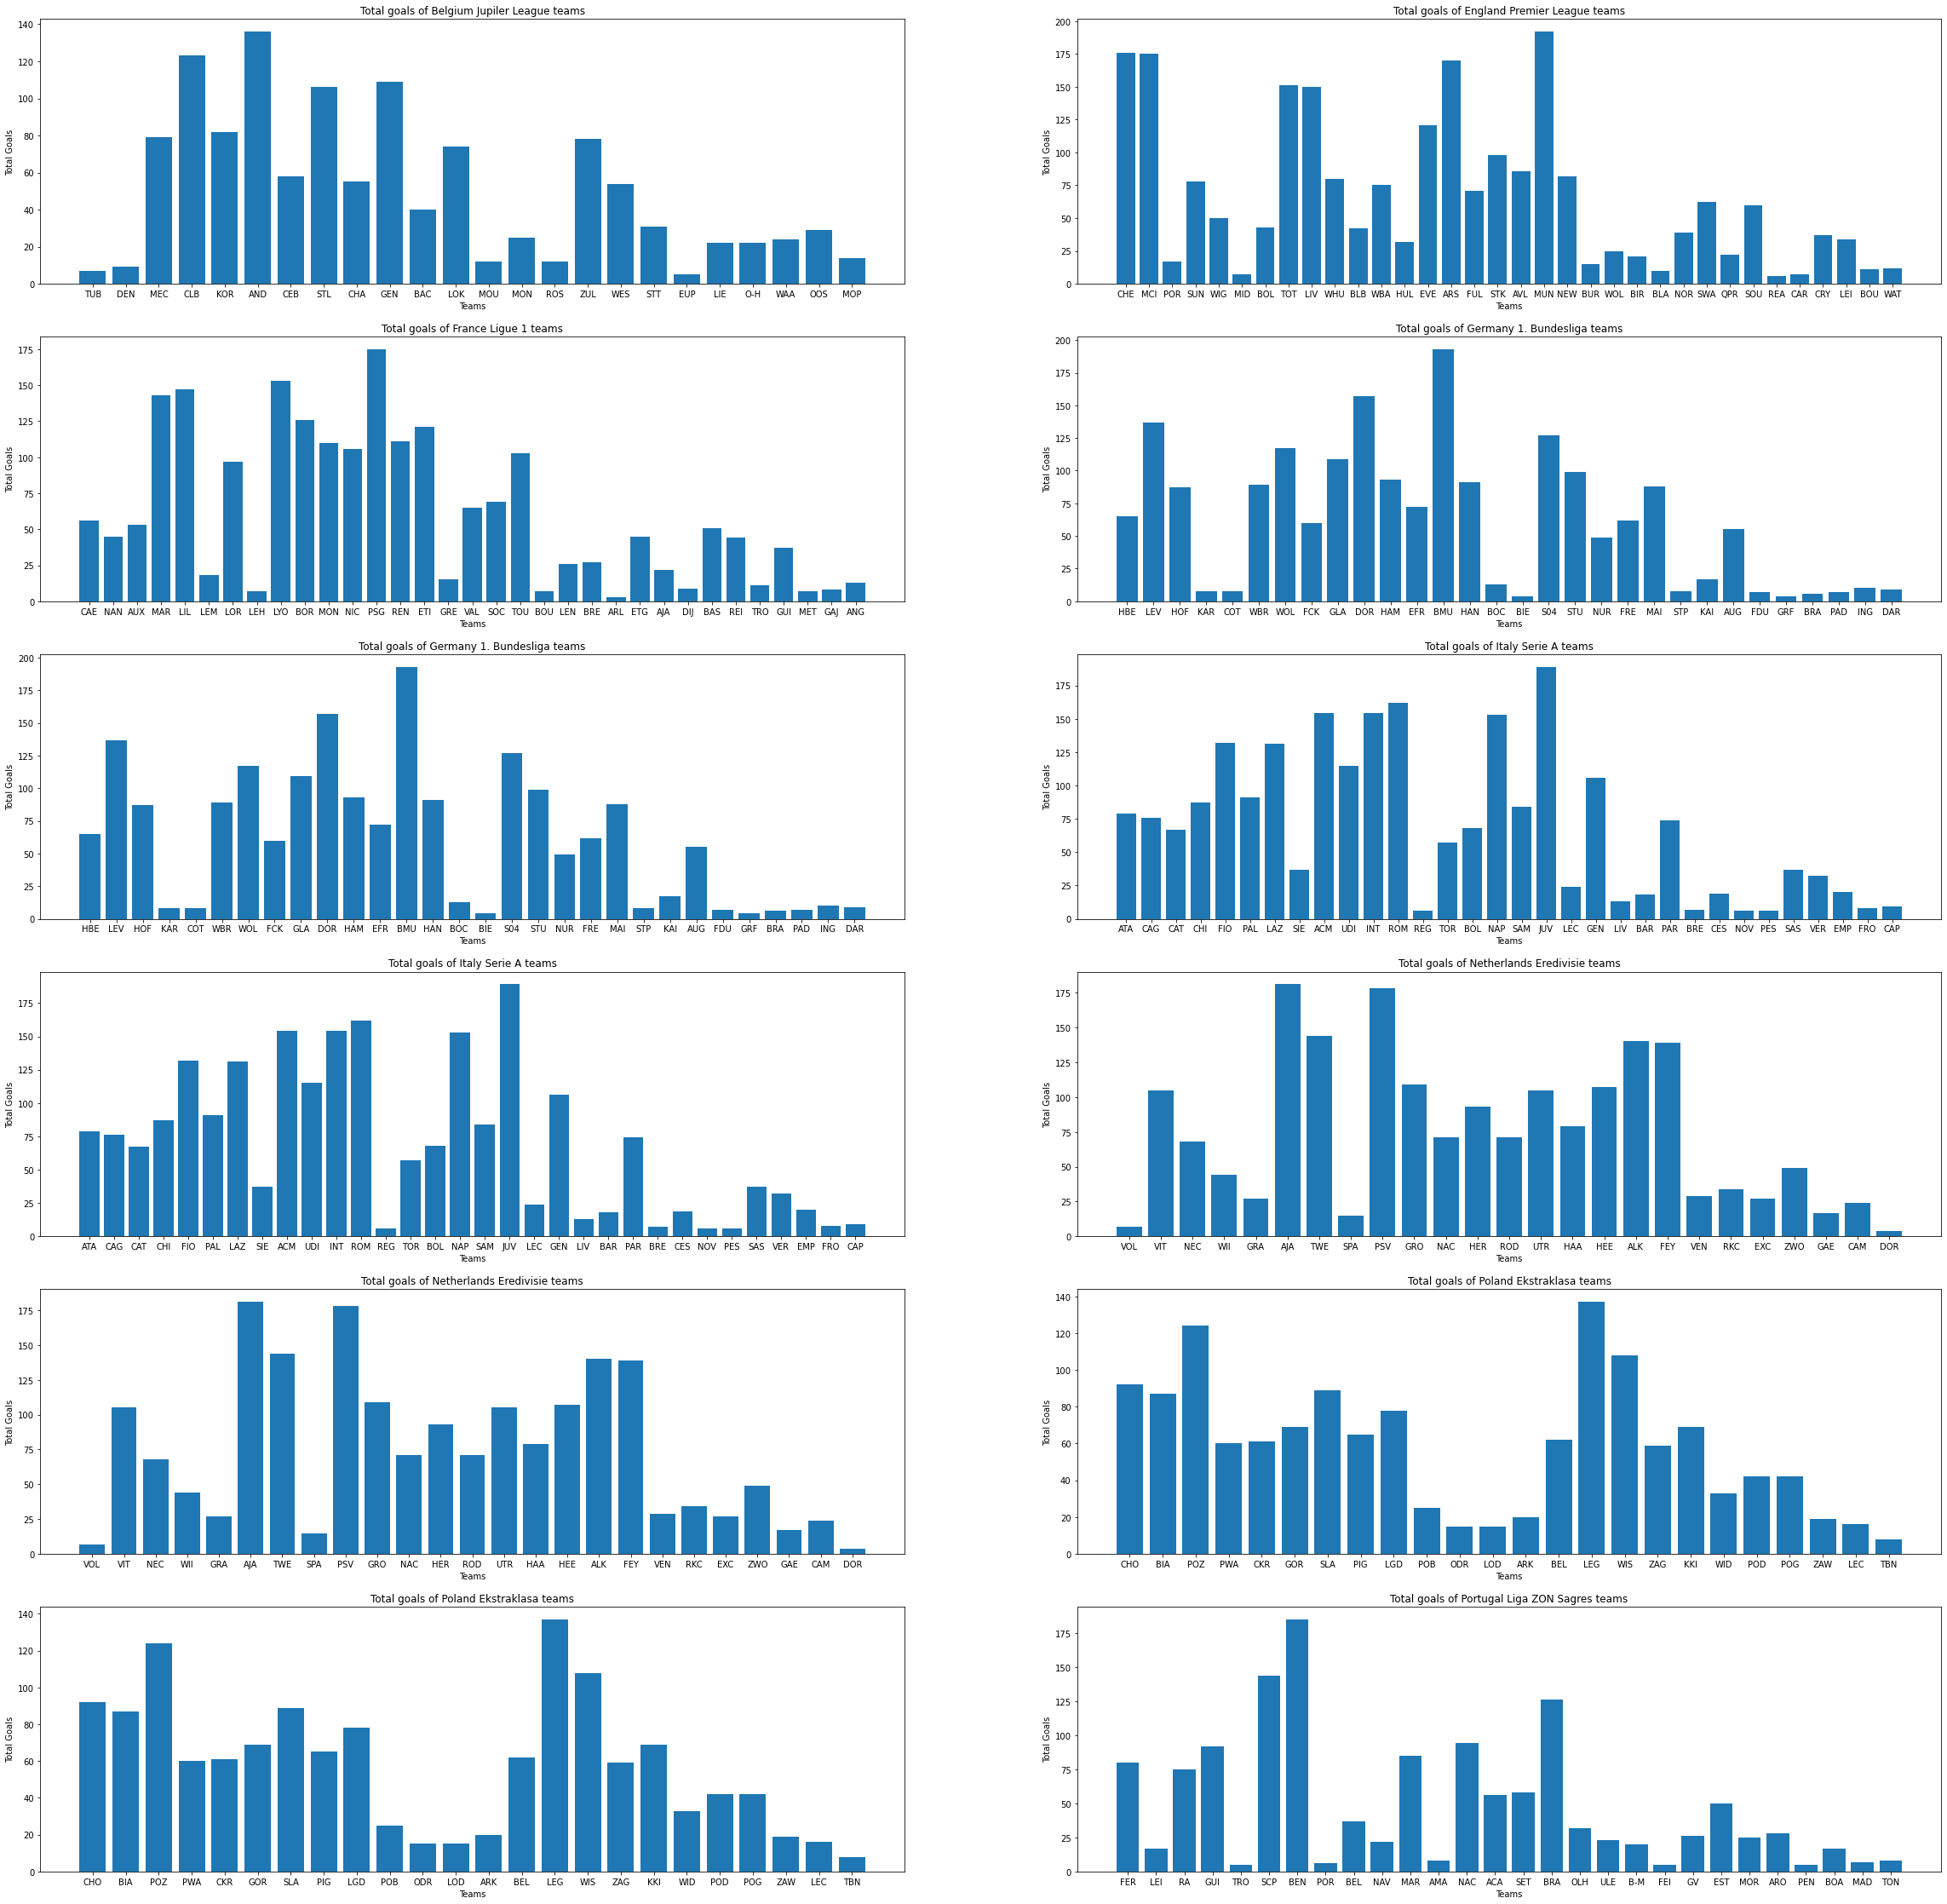

In [622]:
#Graphing total goals of each team in each league

fig = plt.figure(figsize = (40,40))
gs = fig.add_gridspec(int((len(leagues_seasons_wins.keys())+1)/2), 2)
axs = gs.subplots()

keys = list(leagues_seasons_wins.keys()) 

for i in range(int((len(keys)+1)/2)):
        
    if(i == 0):    
        
        axs[i][0].bar([i for i in range(len(leagues_seasons_wins[keys[i]].values()))],list(leagues_seasons_wins[keys[i]].values()),tick_label = list(leagues_seasons_wins[keys[i]].keys()))
        
        axs[i][0].set_title("Total goals of " + keys[i]+ " teams")
        axs[i][0].set_xlabel("Teams")
        axs[i][0].set_ylabel("Total Goals")
        
        axs[i][1].bar([i for i in range(len(leagues_seasons_wins[keys[i+1]].values()))],list(leagues_seasons_wins[keys[i+1]].values()),tick_label = list(leagues_seasons_wins[keys[i+1]].keys()))    
        axs[i][1].set_title("Total goals of " + keys[i+1]+ " teams")
        axs[i][1].set_xlabel("Teams")
        axs[i][1].set_ylabel("Total Goals")
    
    else:
        axs[i][0].bar([i for i in range(len(leagues_seasons_wins[keys[i+1]].values()))],list(leagues_seasons_wins[keys[i+1]].values()),tick_label = list(leagues_seasons_wins[keys[i+1]].keys()))
        axs[i][0].set_title("Total goals of " + keys[i+1]+ " teams")
        axs[i][0].set_xlabel("Teams")
        axs[i][0].set_ylabel("Total Goals")
        
        axs[i][1].bar([i for i in range(len(leagues_seasons_wins[keys[i+2]].values()))],list(leagues_seasons_wins[keys[i+2]].values()),tick_label = list(leagues_seasons_wins[keys[i+2]].keys()))  
        
        axs[i][1].set_title("Total goals of " + keys[i+2]+ " teams")
        axs[i][1].set_xlabel("Teams")
        axs[i][1].set_ylabel("Total Goals")
    
    

# Question 2: Which player improved the most in penalties?

To answer this questions, we will need to join player table with player attributes table on player_id column.

In [623]:
sql = pd.read_sql_query("SELECT Player.player_name, Player_Attributes.penalties, Player_Attributes.date FROM Player INNER JOIN Player_Attributes on Player.player_api_id = Player_Attributes.player_api_id",conn)
penalties_df = pd.DataFrame(sql)
penalties_df

,player_name,penalties,date
0,Aaron Appindangoye,48.0,2016-02-18 00:00:00
1,Aaron Appindangoye,48.0,2015-11-19 00:00:00
2,Aaron Appindangoye,48.0,2015-09-21 00:00:00
3,Aaron Appindangoye,47.0,2015-03-20 00:00:00
4,Aaron Appindangoye,47.0,2007-02-22 00:00:00
...,...,...,...
183973,Zvjezdan Misimovic,83.0,2009-08-30 00:00:00
183974,Zvjezdan Misimovic,70.0,2009-02-22 00:00:00
183975,Zvjezdan Misimovic,70.0,2008-08-30 00:00:00
183976,Zvjezdan Misimovic,53.0,2007-08-30 00:00:00


In [624]:
#check for nulls
penalties_df.isna().sum()

player_name      0
penalties      836
date             0
dtype: int64

In [625]:
# fill nulls by mean of each group
penalties_df = penalties_df.fillna(penalties_df.groupby('player_name')['penalties'].transform('mean'))


In [626]:
penalties_df.isna().sum()

player_name      0
penalties      836
date             0
dtype: int64

In [627]:
#check for data type consistency
penalties_df.dtypes

player_name     object
penalties      float64
date            object
dtype: object

In [628]:
# group penalties by player, then calculate improvement of each player over time

grouped_penalties_df = penalties_df.groupby(["player_name"])

improvements_sum = {"player_name":[],"improvement_over_time":[]}

for name,group in grouped_penalties_df:
    
     
    group = group.iloc[::-1,:]
    improvement = group["penalties"].pct_change().sum()
    
    improvements_sum["player_name"].append(name)
    improvements_sum["improvement_over_time"].append(improvement)



In [629]:
# turn the dictionary into dataframe

improvements_df = pd.DataFrame(improvements_sum )


In [630]:
#To find the maximum improvement

print(improvements_df.query("improvement_over_time == {}".format(max(improvements_df.improvement_over_time))))

            player_name  improvement_over_time
6343  Mahamadou Samassa               7.744299


# Q3: Do rightfoot players have more shot accuracy/power than leftfoot players?

In this question, we will join players and players' attributes table on player id.
According to the data, we will measure shot power with the shot_power column, and the shot accuracy with the free_kick_accuracy column as it is the only column measuring accuracy.

In [631]:
sql = pd.read_sql_query("SELECT Player_Attributes.shot_power, Player_Attributes.free_kick_accuracy,Player.player_name,Player_Attributes.preferred_foot FROM Player_Attributes INNER JOIN Player on Player_Attributes.player_api_id = Player.player_api_id",conn)

shot_power_accuracy_df = pd.DataFrame(sql)
shot_power_accuracy_df

,shot_power,free_kick_accuracy,player_name,preferred_foot
0,55.0,39.0,Aaron Appindangoye,right
1,55.0,39.0,Aaron Appindangoye,right
2,55.0,39.0,Aaron Appindangoye,right
3,54.0,38.0,Aaron Appindangoye,right
4,54.0,38.0,Aaron Appindangoye,right
...,...,...,...,...
183973,76.0,78.0,Zvjezdan Misimovic,right
183974,75.0,74.0,Zvjezdan Misimovic,right
183975,75.0,74.0,Zvjezdan Misimovic,right
183976,72.0,73.0,Zvjezdan Misimovic,right


### As we can notice, every player has multiple shot power/accuracy over time, so we need to replace all the values with the mean value for each player in order to group them by the preferred foot.

In [632]:
#check nulls

shot_power_accuracy_df.isna().sum()

shot_power            836
free_kick_accuracy    836
player_name             0
preferred_foot        836
dtype: int64

#### Here, we can notice that there are 836 null values in each column except for the player_name. In this case, we will deal with nulls in a different way. 
First, we will replace the shot power/accuracy with the mean of each group. we will group by player_name.
Second, with respect to prefferred_foot, if the player has multiple data in which his preferred foor is mentioned, then we will replace the nulls with this value. Else, we will remove the nulls here as we cannot decide his preffered foor arbitrarly.

In [633]:
grouped_shots = shot_power_accuracy_df.groupby("player_name")


In [634]:
#function to calcualte series unique

def get_mode(series):
    unique = series.unique()
    return unique[0]

# remove groups where all the preferred foor values are nulls

for name,group in grouped_shots:
                
    nulls = group["preferred_foot"].isna().sum()
    if(nulls == group.shape[0]):

        df.drop(group.index)

# replace nulls with mode for preferred foot, and mean with shot power/accuracy

shot_power_accuracy_df["preferred_foot"].fillna(grouped_shots["preferred_foot"].transform(get_mode),inplace = True)
shot_power_accuracy_df["shot_power"].fillna(grouped_shots["shot_power"].transform('mean'),inplace = True)
shot_power_accuracy_df["free_kick_accuracy"].fillna(grouped_shots["free_kick_accuracy"].transform('mean'),inplace = True)


In [635]:
shot_power_accuracy_df[shot_power_accuracy_df.player_name == "Abdeslam Ouaddou"]

,shot_power,free_kick_accuracy,player_name,preferred_foot
478,72.0,26.0,Abdeslam Ouaddou,right
479,82.0,26.0,Abdeslam Ouaddou,right
480,82.0,26.0,Abdeslam Ouaddou,right
481,82.0,26.0,Abdeslam Ouaddou,right
482,82.0,69.0,Abdeslam Ouaddou,right
483,80.0,34.6,Abdeslam Ouaddou,right


In [636]:
#check nulls
shot_power_accuracy_df.isna().sum()

shot_power            0
free_kick_accuracy    0
player_name           0
preferred_foot        0
dtype: int64

In [637]:
# drop the name column, then group by preferred_foot

shot_power_accuracy_df.drop(columns = "player_name",inplace = True)

grouped_shots = shot_power_accuracy_df.groupby("preferred_foot")

In [638]:
shot_power_means = grouped_shots.mean()["shot_power"]
free_kick_accuracy_means = grouped_shots.mean()["free_kick_accuracy"]

Text(0, 0.5, 'Average free kick accuracy')

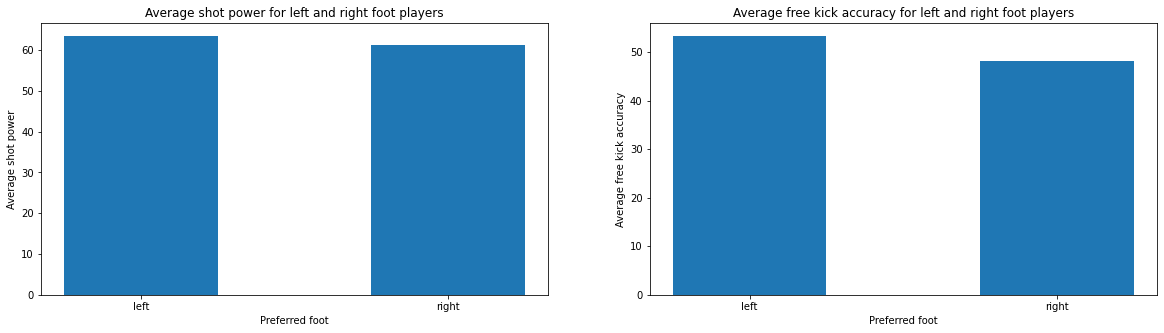

In [639]:
fig= plt.figure(figsize = (20,5))
gs = fig.add_gridspec(1,2)
axs = gs.subplots()

axs[0].bar([1,2],shot_power_means, tick_label = ['left','right'],width = 0.5)
axs[0].set_title("Average shot power for left and right foot players")
axs[0].set_xlabel("Preferred foot")
axs[0].set_ylabel("Average shot power")

axs[1].bar([1,2],free_kick_accuracy_means, tick_label = ['left','right'],width = 0.5)
axs[1].set_title("Average free kick accuracy for left and right foot players")
axs[1].set_xlabel("Preferred foot")
axs[1].set_ylabel("Average free kick accuracy")

### It appears that the average shot power and accuracy for left foot players is more than that of right foot players